In [8]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as datasets
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import cv2
from scipy.signal import convolve2d
from scipy.fftpack import fft, ifft, fft2, ifft2, fftshift, ifftshift
from sklearn.decomposition import PCA
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

%matplotlib inline

In [23]:
def displayImage(img, title):
    f, ax = plt.subplots(sharex='col', sharey='row', figsize=(12,12))

    ax.imshow(img, cmap='gray')
    ax.set_title(title)

In [24]:
def displayAndCreateFigureOfTwoImages(img1, img2, title1, title2):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12,12))

    ax1.imshow(img1, cmap='gray')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap='gray')
    ax2.set_title(title2)

In [11]:
img = cv2.imread("../MURA-v1.1/train/XR_FOREARM/patient01400/study1_positive/image1.png", cv2.IMREAD_GRAYSCALE)
#img = cv2.imread("../train/XR_FOREARM/patient00063/study1_positive/image1.png", cv2.IMREAD_GRAYSCALE)
#img = cv2.imread("../demo_pics/2.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("../demo_pics/5.png", cv2.IMREAD_GRAYSCALE)
img = np.array(img).astype('uint8')

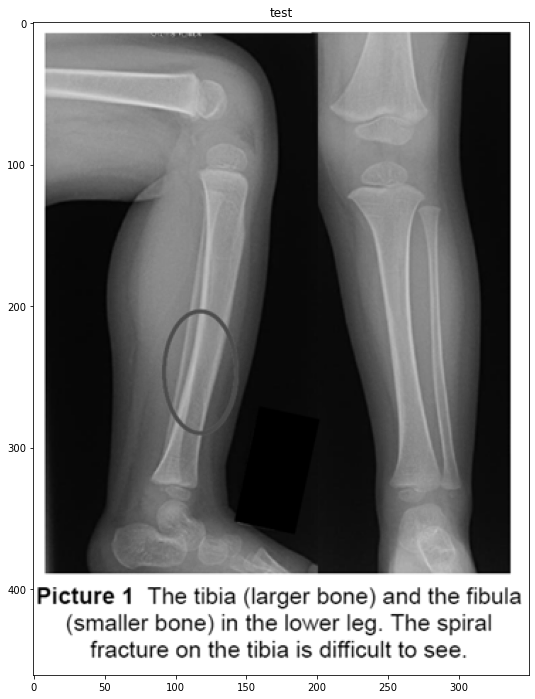

In [25]:
displayImage(img, "test")

In [358]:
kernel_1 = np.ones((3,3))
kernel_1[1,1] = -5
print(kernel_1)
print()
kernel_2 = np.ones((3,3))*-1
kernel_2[1,1] = 9
print(kernel_2)

[[ 1.  1.  1.]
 [ 1. -5.  1.]
 [ 1.  1.  1.]]

[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


In [378]:
"""img_drev = cv2.Canny(img, 50, 60)
displayImage(img_drev, "img_drev")
img_dev_img_weight = cv2.addWeighted(img, 0.6,img_drev, 0.6, 0)
displayImage(img_dev_img_weight, "img_dev_img_weight")"""

'img_drev = cv2.Canny(img, 50, 60)\ndisplayImage(img_drev, "img_drev")\nimg_dev_img_weight = cv2.addWeighted(img, 0.6,img_drev, 0.6, 0)\ndisplayImage(img_dev_img_weight, "img_dev_img_weight")'

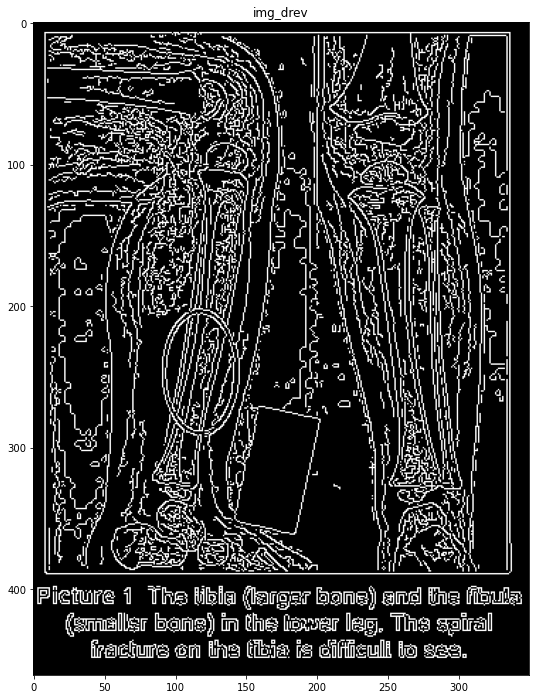

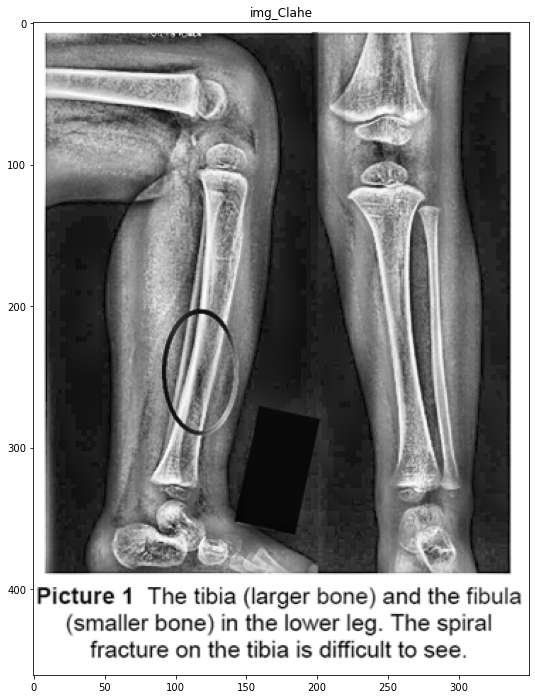

In [35]:
#img_ker=convolve2d(img,kernel_2, )
#displayImage(img_ker, "img_ker")
img_eq = cv2.equalizeHist(img)
#displayImage(img_eq, "img_eq")
img_drev = cv2.Canny(img_eq, 20, 40)
displayImage(img_drev, "img_drev")
CLAHE_obj = cv2.createCLAHE(clipLimit=10, tileGridSize=(20,20)) # Good
#CLAHE_obj2 = cv2.createCLAHE(clipLimit=8, tileGridSize=(16,16))
img_Clahe = CLAHE_obj.apply(img).astype('uint8')
#img_Clahe2 = CLAHE_obj2.apply(img).astype('uint8')
#displayAndCreateFigureOfTwoImages(img_Clahe, img_Clahe2, "img_Clahe", "img_Clahe2")
#displayImage(img_Clahe, "img_Clahe")
displayImage(img_Clahe, "img_Clahe")
#displayAndCreateFigureOfTwoImages(img_Clahe, img, "img_Clahe", "img")

In [9]:
#img_drev = cv2.Canny(img_Clahe, 100, 160)
kernel_3 = np.array([[-1, -1, -1],
                      [-1, 30, -1],
                      [-1, -1, -1]])
#img_ker3 = convolve2d(img_Clahe, kernel_3, mode='same')
#displayImage(img_ker3, "img_ker3")
#displayAndCreateFigureOfTwoImages(img_ker3, img_Clahe, "img_ker3", "img_Clahe")
#displayImage(img_drev, "img_drev")
#img_dev_img_weight = cv2.addWeighted(img_Clahe, 0.6,img_drev, 0.6, 0)
#displayImage(img_dev_img_weight, "img_dev_img_weight")
#displayAndCreateFigureOfTwoImages(img_dev_img_weight, img_Clahe, "img_dev_img_weight", "img_Clahe")

In [10]:
im2 = cv2.GaussianBlur(img_ker, (3,3))
print(im2.shape)
print(img.shape)
i1 = cv2.addWeighted(img, 1.5, im2, -0.5,0)
i4 = cv2.addWeighted(img, 2, im2, -2.,0)
i5 = cv2.addWeighted(i1, 0.5, i4, 20,0)
displayImage(i1, "test1")
displayImage(i4, "test4")
displayImage(i5, "test5")


NameError: name 'img_ker' is not defined

In [11]:
img_smooth = cv2.bilateralFilter(i5, d=5, sigmaColor=2, sigmaSpace=4)
#displayAndCreateFigureOfTwoImages(img, img_smooth, "img", "img2")

NameError: name 'i5' is not defined

In [51]:
test_den = cv2.fastNlMeansDenoising(img_Clahe,h=6.5)
#displayImage(test_den, "test_den")
#displayAndCreateFigureOfTwoImages(img, test_den, "img", "test_den")
#displayAndCreateFigureOfTwoImages(img_Clahe, test_den, "img_Clahe", "test_den")


In [28]:
def l0_gradient_minimization_2d(I, lmd, beta_max, beta_rate=2.0, max_iter=30, return_history=False):
     S = np.array(I)

     # prepare FFT
     F_I = fft2(S, axes=(0, 1))
     Ny, Nx = S.shape[:2]
     D = S.shape[2] if S.ndim == 3 else 1
     dx, dy = np.zeros((Ny, Nx)), np.zeros((Ny, Nx))
     dx[int(Ny/2), int(Nx/2-1):int(Nx/2+1)] = [-1, 1]
     dy[int(Ny/2-1):int(Ny/2+1), int(Nx/2)] = [-1, 1]
     F_denom = np.abs(fft2(dx))**2.0 + np.abs(fft2(dy))**2.0
     if D > 1: F_denom = np.dstack([F_denom]*D)

     S_history = [S]
     beta = lmd * 2.0
     hp, vp = np.zeros_like(S), np.zeros_like(S)
     for i in range(max_iter):
        #print(i)
        # with S, solve for hp and vp in Eq. (12)
        hp, vp = circulant2_dx(S, 1), circulant2_dy(S, 1)
        if D == 1:
            mask = hp**2.0 + vp**2.0 < lmd/beta
        else:
            mask = np.sum(hp**2.0 + vp**2.0, axis=2) < lmd/beta
        hp[mask] = 0.0
        vp[mask] = 0.0

        # with hp and vp, solve for S in Eq. (8)
        hv = circulant2_dx(hp, -1) + circulant2_dy(vp, -1)
        S = np.real(ifft2((F_I + (beta*fft2(hv, axes=(0, 1))))/(1.0 + beta*F_denom), axes=(0, 1)))

        # iteration step
        if return_history:
            S_history.append(np.array(S))
        beta *= beta_rate
        if beta > beta_max: break

     if return_history:
        return S_history

     return S

In [29]:
def circulantshift2_x(xs, h):
    return np.hstack([xs[:, h:], xs[:, :h]] if h > 0 else [xs[:, h:], xs[:, :h]])

def circulantshift2_y(xs, h):
    return np.vstack([xs[h:, :], xs[:h, :]] if h > 0 else [xs[h:, :], xs[:h, :]])

def circulant2_dx(xs, h):
    return (circulantshift2_x(xs, h) - xs)

def circulant2_dy(xs, h):
    return (circulantshift2_y(xs, h) - xs)

In [ ]:
# Using eran alghoritem to smooth

In [31]:
#img_l0 = l0_gradient_minimization_2d(img_Clahe, with_smoth=1, wind_s=20, lmd=0.15)
img_l0 = l0_gradient_minimization_2d(img_Clahe ,lmd=0.15 , beta_max=100000)

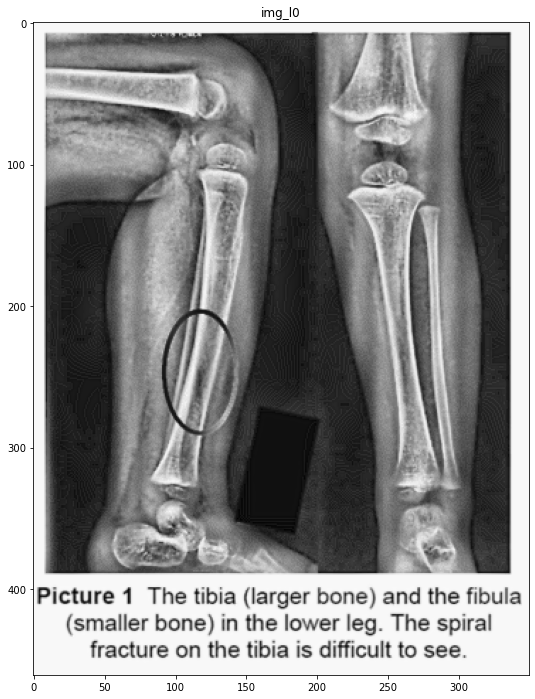

In [32]:
displayImage(img_l0, "img_l0")

In [7]:
data_paths_dataframe = pd.read_csv("../train_image_paths.csv", header=None)
data_forearm_paths = data_paths_dataframe[data_paths_dataframe[0].str.contains('XR_FOREARM')]

In [81]:
data_labels_dataframe = pd.read_csv("../train_labeled_studies.csv", header=None)
data_forearm_lables = data_labels_dataframe[data_labels_dataframe[0].str.contains('XR_FOREARM')]

In [286]:
data_paths_negative = data_forearm_paths[data_forearm_paths[0].str.contains('negative')]
data_paths_positive = data_forearm_paths[data_forearm_paths[0].str.contains('positive')]
data_forearm_paths[data_forearm_paths[0].str.contains('positive')].iloc[:52].to_csv('../forearm_paths_positive_51.csv', index=False, header=None)
data_forearm_paths[data_forearm_paths[0].str.contains('positive')].iloc[:52]#.to_csv('../forearm_paths_positive_51.csv', index=False, header=None)

In [12]:
data_forearm_paths.to_csv('../forearm_paths.csv', index=False, header=None)

In [90]:
data_paths_negative.to_csv('../forearm_paths_negative.csv', index=False, header=None)
data_paths_positive.to_csv('../forearm_paths_positive.csv', index=False, header=None)

In [4]:
data_paths_val_dataframe = pd.read_csv("../valid_image_paths.csv", header=None)
data_forearm_val_paths = data_paths_val_dataframe[data_paths_val_dataframe[0].str.contains('XR_FOREARM')]

In [6]:
data_forearm_val_paths.to_csv('../forearm_paths_val.csv', index=False, header=None)

In [65]:
data_forearm_paths

,0
29440,MURA-v1.1/train/XR_FOREARM/patient09083/study1...
29441,MURA-v1.1/train/XR_FOREARM/patient09083/study1...
29442,MURA-v1.1/train/XR_FOREARM/patient05601/study1...
29443,MURA-v1.1/train/XR_FOREARM/patient05601/study1...
29444,MURA-v1.1/train/XR_FOREARM/patient05601/study1...
...,...
31260,MURA-v1.1/train/XR_FOREARM/patient09732/study1...
31261,MURA-v1.1/train/XR_FOREARM/patient09732/study1...
31262,MURA-v1.1/train/XR_FOREARM/patient09733/study1...
31263,MURA-v1.1/train/XR_FOREARM/patient09733/study1...


In [ ]:
def preprocess image

In [26]:
def create_descriptors_list(paths):
    fast = cv2.FastFeatureDetector_create()
    

In [22]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img_Clahe,None)
img2 = cv2.drawKeypoints(img_Clahe, kp, color=(255,0,0), outImage = None)


In [24]:
 br = cv2.BRISK_create()
 kp, des = br.compute(img2,  kp)  # note: no mask here!

In [209]:
np.save('../test.npy',des)

In [211]:
info = np.load('../test.npy')

In [174]:
"""a,b = train_list.shape
train_flat = train_list.reshape(a*b)
np.array2string(train_flat)

"""

'[ 97  51 160 ... 141  25  18]'

In [185]:
with open('listfile.txt', 'w') as filehandle:
    filehandle.write(str_lst)

In [179]:
#define an empty list
places = []

# open file and read the content in a list
with open('listfile.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        places.append(currentPlace)

In [180]:
len(places)

4

In [115]:
print(np.fromstring(array_str, sep='\t'))

[]


In [27]:
def create_kmeans_obj(data, k=1000, batch_size=100):
    #k = np.size(species) * 10

    #batch_size = np.size(os.listdir(img_path)) * 3
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(data)
    return kmeans

In [49]:
kmeans_obj = create_kmeans_obj(data=train_list, k=1000, batch_size=10)

Init 1/3 with method: k-means++
Inertia for init 1/3: 524064896.732812
Init 2/3 with method: k-means++
Inertia for init 2/3: 515810583.799072
Init 3/3 with method: k-means++
Inertia for init 3/3: 520261334.023995
Minibatch iteration 1/92600: mean batch inertia: 264897.533767, ewa inertia: 264897.533767 
Minibatch iteration 2/92600: mean batch inertia: 242215.723478, ewa inertia: 264848.529100 
Minibatch iteration 3/92600: mean batch inertia: 272676.950562, ewa inertia: 264865.442617 
Minibatch iteration 4/92600: mean batch inertia: 240751.623251, ewa inertia: 264813.344055 
Minibatch iteration 5/92600: mean batch inertia: 263488.332982, ewa inertia: 264810.481333 
Minibatch iteration 6/92600: mean batch inertia: 290580.214450, ewa inertia: 264866.157541 
Minibatch iteration 7/92600: mean batch inertia: 222055.143341, ewa inertia: 264773.663182 
Minibatch iteration 8/92600: mean batch inertia: 219748.567965, ewa inertia: 264676.385241 
Minibatch iteration 9/92600: mean batch inertia: 26

In [50]:
kmeans_obj.cluster_centers_.shape

(1000, 64)

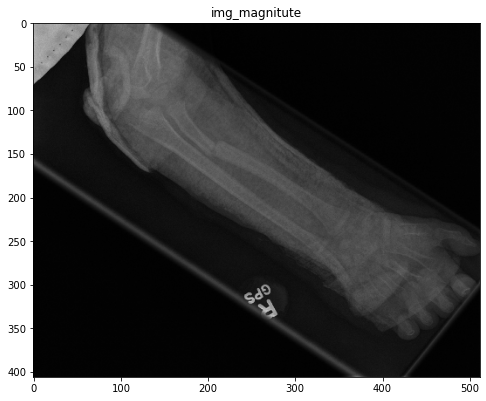

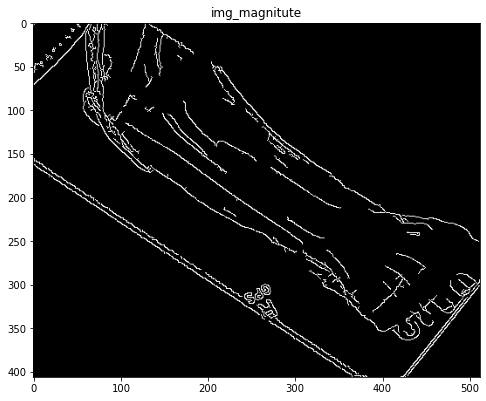

In [315]:
img_magnitute2 = cv2.Canny(img, 40, 100)
displayImage(img, "img_magnitute")
displayImage(img_magnitute2, "img_magnitute")

In [28]:
def get_im(path):   
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = np.array(img).astype('uint8')
    return img

def stab_hist(im, wind_s):
    img_eq = cv2.equalizeHist(im)
    CLAHE_obj = cv2.createCLAHE(clipLimit=10, tileGridSize=(wind_s,wind_s)) # Good
    img_Clahe = CLAHE_obj.apply(im).astype('uint8')
    return img_Clahe

def prepro(im, with_smoth, wind_s, lmd):
    stab_im = stab_hist(im, wind_s)
    if with_smoth == 1:
        stab_im = l0_gradient_minimization_2d(stab_im ,lmd , 100000)
    return stab_im.astype('uint8')

def get_features(train_path, dest = '../test.npy', with_smoth=1, wind_s=20, lmd=0.15, last_ite_dest='../last_it.npy'):

    fast = cv2.FastFeatureDetector_create()
    # run on file path and read images for each im_path
    data_paths_dataframe = pd.read_csv(train_path, header=None)
    des_lst = np.empty((0,64))
    for i in range(data_paths_dataframe.shape[0]):
        relative_im_path = "../{}".format(data_paths_dataframe.iloc[i,0])
        #print(relative_im_path)
        im = get_im(relative_im_path)
        #displayImage(im, "im")
        im = prepro(im,with_smoth, wind_s, lmd)
        #displayImage(im, "im_prepro")
        kp = fast.detect(im, None)
        br = cv2.BRISK_create()
        kp, des = br.compute(im,  kp)  # note: no mask here!
        des_lst = np.vstack((des_lst, des))
        if i % 50 == 0   or (i == data_paths_dataframe.shape[0] -1):
            np.save(last_ite_dest,np.array([i]))
            np.save(dest,des_lst)

            print("i:", i)
        
    return


def get_im_descriptors(im, with_smoth=1, wind_s=20, lmd=0.15):
    im = prepro(im,with_smoth, wind_s, lmd)
    fast = cv2.FastFeatureDetector_create()
    #displayImage(im, "im_prepro")
    kp = fast.detect(im, None)
    br = cv2.BRISK_create()
    kp, des = br.compute(im,  kp)  # note: no mask here!

    return kp, des


In [311]:
#get_features(train_path="../forearm_paths_negative.csv", dest = '../test.npy', with_smoth=1, wind_s=20, lmd=0.15)

i: 0
i: 50
i: 100
i: 150
i: 200
i: 250
i: 300
i: 350
i: 400
i: 450
i: 500
i: 550
i: 600
i: 650
i: 700
i: 750
i: 800
i: 850
i: 900
i: 950
i: 1000
i: 1050
i: 1100
i: 1150
i: 1163


In [ ]:
get_features(train_path="./forearm_paths.csv", dest = '../forearm_des.npy', with_smoth=1, wind_s=20, lmd=0.15)

In [84]:
def create_kmeans_obj(data, k=1000, batch_size=100):
    #k = np.size(species) * 10

    #batch_size = np.size(os.listdir(img_path)) * 3
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(data)
    return kmeans

def predict_image(img_path, centers_tree, num_of_centers):
    im = get_im(img_path)
    kp, des = get_im_descriptors(im)
    #print("des.shape: ", des.shape, "\n")
    
    idx = np.array(centers_tree.query(des)[1])
    # histo[idx] += 1/nkp

    #creating the histogram:
    #print("Max value: ", np.max(idx))
    hist = np.zeros(num_of_centers)
    labels_indexes, labels_counts = np.unique(idx ,return_counts=True)
    hist[labels_indexes.astype(int)] = labels_counts

    return idx, hist

def predict_kmeans(img_path, kmeans):
    im = get_im(img_path)
    kp, des = get_im_descriptors(im)
    print("des.shape: ", des.shape, "\n")
    idx = kmeans.predict(des)
    # histo[idx] += 1/nkp

    #creating the histogram:
    print("Max value: ", np.max(idx))
    hist = np.zeros(1000)
    labels_indexes, labels_counts = np.unique(idx ,return_counts=True)
    hist[labels_indexes.astype(int)] = labels_counts

    return idx, hist

def show_hist(hist):
    f, ax = plt.subplots(sharex='col', sharey='row', figsize=(24,8))
    plt.hist(hist, bins=1000, range=[0, 1000])
    plt.show()


In [19]:
data = np.load('../test.npy')
print(data.shape)

(5507913, 64)


In [24]:
#kmeans_obj = create_kmeans_obj(data=data, k=1000, batch_size=10000)

ertia: 283552.486631 
Minibatch iteration 916/55100: mean batch inertia: 284828.498114, ewa inertia: 283557.120005 
Minibatch iteration 917/55100: mean batch inertia: 282042.683617, ewa inertia: 283551.620877 
Minibatch iteration 918/55100: mean batch inertia: 281706.919235, ewa inertia: 283544.922509 
Minibatch iteration 919/55100: mean batch inertia: 281821.452187, ewa inertia: 283538.664349 
Minibatch iteration 920/55100: mean batch inertia: 282115.623083, ewa inertia: 283533.497089 
Minibatch iteration 921/55100: mean batch inertia: 281612.520321, ewa inertia: 283526.521756 
Minibatch iteration 922/55100: mean batch inertia: 283160.837229, ewa inertia: 283525.193904 
Minibatch iteration 923/55100: mean batch inertia: 283034.754323, ewa inertia: 283523.413050 
Minibatch iteration 924/55100: mean batch inertia: 280527.073475, ewa inertia: 283512.532926 
Minibatch iteration 925/55100: mean batch inertia: 284247.795046, ewa inertia: 283515.202764 
Minibatch iteration 926/55100: mean ba

In [99]:
print(kmeans_obj.cluster_centers_.shape)
des_labels_indexes, hist = predict(img_path='../MURA-v1.1/train/XR_FOREARM/patient01400/study1_positive/image1.png', kmeans=kmeans_obj)

print("hist shape: ", hist.shape)


(1000, 64)
des.shape:  (8601, 64) 

Computing label assignment and total inertia
Max value:  999
hist shape:  (1000,)


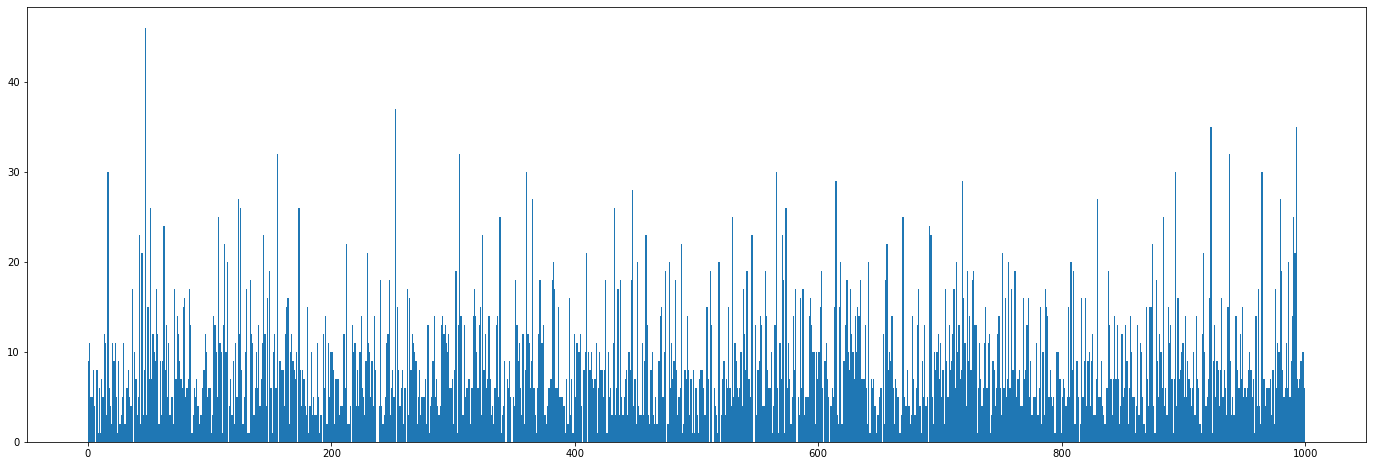

In [100]:
show_hist(des_labels_indexes)

In [14]:
x= np.arange((4,7))
print(x)

TypeError: arange: scalar arguments expected instead of a tuple.

In [12]:
pca = PCA(n_components = 3)
pca.fit(x)
pca.transform(x)

C:\Users\Ilan\anaconda3\envs\Computer Vision\lib\site-packages\sklearn\decomposition\_pca.py:463: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:

def data_to_edges(rgb4,dest,feature):
    x0,y0,z0 = rgb4[-1,0:3]+1
    x0=int(x0)
    y0=int(y0)
    z0=int(z0)
    path = '%s/feature%d' %(dest, feature)
    os.mkdir(path)
    for frame in range(z0):
        im_flat = rgb4[rgb4[:,2] == frame][:,-1]
        im = np.reshape(im_flat,(x0,y0))
        im = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        im = auto_canny(im)
        outfile = '%s/%d.jpg' % (path,frame)
        cv2.imwrite(outfile,im)

def seperatefeatures(data6d,unique_labels,labels,dst):
    data3d = data6d[:,0:3]
    for label in unique_labels:
        feat = np.zeros((labels.shape))
        feat[labels == label] = 255
        feat = np.c_[data3d,feat]
        data_to_edges(feat,dst,label)

    
#prepare 6d dara feature set 
def prepareX_D(X,data):
    pca = PCA(n_components=X)
    pca.fit(data)
    dataout = pca.transform(data)
    return dataout

def load_data(source):
    data = np.load(source)
    return data    


In [40]:
source = '../test.npy'
data = load_data(source)

In [ ]:
data40 = prepareX_D(40,data)

In [24]:
print(data40.shape)
#kmeans40 = create_kmeans_obj(data=data40, k=10000, batch_size=10000)

 1190/55100: mean batch inertia: 164480.057359, ewa inertia: 165618.002235 
Minibatch iteration 1191/55100: mean batch inertia: 165133.455056, ewa inertia: 165616.242777 
Minibatch iteration 1192/55100: mean batch inertia: 164874.576067, ewa inertia: 165613.549682 
Minibatch iteration 1193/55100: mean batch inertia: 164456.557329, ewa inertia: 165609.348483 
Minibatch iteration 1194/55100: mean batch inertia: 164292.515268, ewa inertia: 165604.566879 
Minibatch iteration 1195/55100: mean batch inertia: 166139.323364, ewa inertia: 165606.508654 
Minibatch iteration 1196/55100: mean batch inertia: 164995.839420, ewa inertia: 165604.291229 
Minibatch iteration 1197/55100: mean batch inertia: 163433.948976, ewa inertia: 165596.410415 
Minibatch iteration 1198/55100: mean batch inertia: 165324.643720, ewa inertia: 165595.423592 
Minibatch iteration 1199/55100: mean batch inertia: 164215.209686, ewa inertia: 165590.411844 
Minibatch iteration 1200/55100: mean batch inertia: 165025.934921, ew

In [86]:
print(kmeans40.labels_)

[2100 5797  330 ... 1208 6873 8475]
[   0    1    2 ... 9997 9998 9999]


In [35]:
data = np.array([[1,2],[2,4],[3,6],[4,8],[5, 10],[3,6]])
ids  = [0,0,1,2,2,1]

#np.bincount(ids, weights=data) #returns [3,9,9] as a float64 array

In [31]:
def create_original_dimention_centroids(data, labels):
    print("Got {} unique labels".format(np.unique(labels).shape))
    centroids_original_dimention = []
    for i in range(data.shape[1]):
        col = data[:,i]
        centroids_original_dimention.append(np.bincount(labels, weights=col))
        print("Finished {} dimention".format(i))
        #print(centroids_original_dimention[0].shape)
        
    #un, counts = np.unique(labels, return_counts=True)

    return np.array(centroids_original_dimention).T


In [84]:
print(centroids_64.shape)

(10000, 64)


In [32]:
def create_original_dimention_centroids(data, labels):
    print("Got {} unique labels".format(np.unique(labels).shape))
    centroids_original_dimention = []
    labels_type, label_count = np.unique(labels, return_counts=True)
    for i in range(len(labels_type)):
        centroids_original_dimention.append(data[labels == labels_type[i]].sum(axis=0) / label_count[i])
        if(i % 100 == 0 or i == len(labels_type) - 1):
            print("Finished the {} iteration".format(i))
        
    #un, counts = np.unique(labels, return_counts=True)

    return np.array(centroids_original_dimention)


In [103]:
centroids_64 = create_original_dimention_centroids(data=data, labels=kmeans40.labels_)

Got (9977,) unique labels
Finished the 0 iteration
Finished the 100 iteration
Finished the 200 iteration
Finished the 300 iteration
Finished the 400 iteration
Finished the 500 iteration
Finished the 600 iteration
Finished the 700 iteration
Finished the 800 iteration
Finished the 900 iteration
Finished the 1000 iteration
Finished the 1100 iteration
Finished the 1200 iteration
Finished the 1300 iteration
Finished the 1400 iteration
Finished the 1500 iteration
Finished the 1600 iteration
Finished the 1700 iteration
Finished the 1800 iteration
Finished the 1900 iteration
Finished the 2000 iteration
Finished the 2100 iteration
Finished the 2200 iteration
Finished the 2300 iteration
Finished the 2400 iteration
Finished the 2500 iteration
Finished the 2600 iteration
Finished the 2700 iteration
Finished the 2800 iteration
Finished the 2900 iteration
Finished the 3000 iteration
Finished the 3100 iteration
Finished the 3200 iteration
Finished the 3300 iteration
Finished the 3400 iteration
Finish

In [106]:
print(kmeans40.labels_.shape)
print(data.shape)
un, counts = np.unique(kmeans40.labels_, return_counts=True)
print(counts.shape)
print(un.shape)
print(np.max(counts))
print(centroids_64.shape)

(5507913,)
(5507913, 64)
(9977,)
(9977,)
25438
(9977, 64)


In [107]:
print(centroids_64)

[[195.27184466  41.53398058  53.2631068  ... 206.6776699  172.76213592
   84.44854369]
 [201.58166667 233.36666667 221.355      ...  45.48166667  45.22
   54.00333333]
 [225.24786325 238.74358974 224.04273504 ... 197.72863248 161.02564103
  123.95299145]
 ...
 [132.3557423  137.767507   162.51820728 ...  44.2745098   94.42016807
  198.85714286]
 [215.75280899 169.86516854 162.14606742 ...   8.          17.
   18.        ]
 [217.5974026   46.78293135 142.6122449  ...  77.567718   185.82003711
  208.47680891]]


In [151]:
from scipy import spatial
A = [[0,1,2,3,4], [4,3,2,1,0], [2,5,3,7,1], [1,0,1,0,1]]
tree = spatial.KDTree(A)
tree.query([[0.5,0.5,0.5,0.5,0.5], [0.5,0.5,0.5,0.5,0.5]])

(array([1.11803399, 1.11803399]), array([3, 3], dtype=int64))

In [119]:
centers_tree = spatial.KDTree(centroids_64)

In [153]:
des_labels_indexes, hist = predict_image(img_path='../MURA-v1.1/train/XR_FOREARM/patient01400/study1_positive/image1.png', centers_tree=centers_tree, num_of_centers=centroids_64.shape[0])

print("hist shape: ", hist.shape)


des.shape:  (8601, 64) 

Max value:  9970
hist shape:  (9977,)


In [16]:
#show_hist(des_labels_indexes)
print()

In [34]:
source = '../forearm_des.npy'
get_features(train_path="../forearm_paths.csv", dest = source, with_smoth=1, wind_s=20, lmd=0.15)

i: 0
i: 50
i: 100
i: 150
i: 200
i: 250
i: 300
i: 350
i: 400
i: 450
i: 500
i: 550
i: 600
i: 650
i: 700
i: 750
i: 800
i: 850
i: 900
i: 950
i: 1000
i: 1050
i: 1100
i: 1150
i: 1200
i: 1250
i: 1300
i: 1350
i: 1400
i: 1450
i: 1500
i: 1550
i: 1600
i: 1650
i: 1700
i: 1750
i: 1800
i: 1824


In [35]:
data = load_data(source)
print(data.shape)
data40 = prepareX_D(40,data)

(11034499, 64)


In [36]:
kmeans40 = create_kmeans_obj(data=data40, k=10000, batch_size=500)
centroids_64 = create_original_dimention_centroids(data=data, labels=kmeans40.labels_)
np.save('../centroids64_forearm_batch500_', centroids_64)

iteration 28035/2206900: mean batch inertia: 181221.744208, ewa inertia: 182167.036476 
Minibatch iteration 28036/2206900: mean batch inertia: 175706.504961, ewa inertia: 182166.450992 
Minibatch iteration 28037/2206900: mean batch inertia: 183015.700650, ewa inertia: 182166.527955 
Minibatch iteration 28038/2206900: mean batch inertia: 179872.162067, ewa inertia: 182166.320028 
Minibatch iteration 28039/2206900: mean batch inertia: 177730.140044, ewa inertia: 182165.918000 
Minibatch iteration 28040/2206900: mean batch inertia: 179777.095390, ewa inertia: 182165.701513 
Minibatch iteration 28041/2206900: mean batch inertia: 180466.840657, ewa inertia: 182165.547554 
Minibatch iteration 28042/2206900: mean batch inertia: 183268.326250, ewa inertia: 182165.647493 
Minibatch iteration 28043/2206900: mean batch inertia: 175185.077096, ewa inertia: 182165.014880 
Minibatch iteration 28044/2206900: mean batch inertia: 184995.337110, ewa inertia: 182165.271378 
Minibatch iteration 28045/2206

In [300]:
kmeans40_200 = create_kmeans_obj(data=data40, k=10000, batch_size=200)
centroids_64_200 = create_original_dimention_centroids(data=data, labels=kmeans40.labels_)
np.save('../centroids64_forearm_batch200', centroids_64)

C:\Users\Ilan\anaconda3\envs\Computer Vision\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
Init 1/3 with method: k-means++
Inertia for init 1/3: 4158285411.924635
Init 2/3 with method: k-means++
Inertia for init 2/3: 4137471598.973274
Init 3/3 with method: k-means++
Inertia for init 3/3: 4133173038.153360
Minibatch iteration 1/5517300: mean batch inertia: 203045.991451, ewa inertia: 203045.991451 
Minibatch iteration 2/5517300: mean batch inertia: 216861.580973, ewa inertia: 203046.492265 
Minibatch iteration 3/5517300: mean batch inertia: 197212.417019, ewa inertia: 203046.280780 
Minibatch iteration 4/5517300: mean batch inertia: 216142.738367, ewa inertia: 203046.755526 
Minibatch iteration 5/5517300: mean batch inertia: 213391.

In [39]:
bulbul, c = np.unique(kmeans40.labels_,return_counts=True)


In [42]:
centers_tree = spatial.KDTree(centroids_64)

In [43]:
des_labels_indexes, hist = predict_image(img_path='../MURA-v1.1/train/XR_FOREARM/patient01400/study1_positive/image1.png', centers_tree=centers_tree, num_of_centers=centroids_64.shape[0])

print("hist shape: ", hist.shape)


des.shape:  (8601, 64) 

Max value:  9999
hist shape:  (10000,)


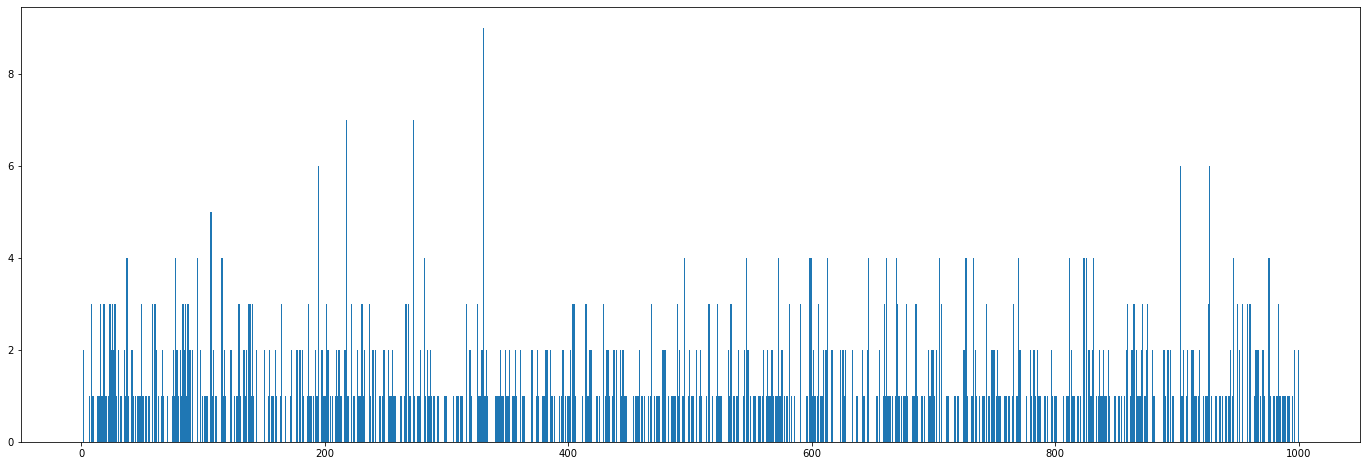

In [342]:
show_hist(des_labels_indexes)

In [298]:
def calculate_hists_dataframe(images_path, dest,centers_tree):
    dataframe = []
    labels = []
    data_paths_dataframe = pd.read_csv(images_path, header=None)
    for i in range(data_paths_dataframe.shape[0]):
        relative_im_path = "../{}".format(data_paths_dataframe.iloc[i,0])
        des_labels_indexes, hist = predict_image(img_path=relative_im_path, centers_tree=centers_tree, num_of_centers=centroids_64.shape[0])
        dataframe.append(hist)
        labels.append(0) if relative_im_path.find('negative') != -1 else labels.append(1)

        if i % 50 == 0 or i == data_paths_dataframe.shape[0] - 1:
            np.save(dest.format('hists'), dataframe)
            np.save(dest.format('labels'), labels)
            print("Finished the {} iteration".format(i))
        
        # For testing
        """if i == 19:
            np.save(dest.format('hists'), dataframe)
            np.save(dest.format('labels'), labels)
            print("Finished the {} iteration".format(i))
            return dataframe, labels"""



    return dataframe, labels
        

In [299]:
dataframe_forearm, labels_forearm = calculate_hists_dataframe(images_path='../forearm_paths.csv', dest='../forearm_train_{}.npy',centers_tree=centers_tree)

Finished the 0 iteration
Finished the 50 iteration
Finished the 100 iteration
Finished the 150 iteration
Finished the 200 iteration
Finished the 250 iteration
Finished the 300 iteration
Finished the 350 iteration
Finished the 400 iteration
Finished the 450 iteration
Finished the 500 iteration
Finished the 550 iteration
Finished the 600 iteration
Finished the 650 iteration
Finished the 700 iteration
Finished the 750 iteration
Finished the 800 iteration
Finished the 850 iteration
Finished the 900 iteration
Finished the 950 iteration
Finished the 1000 iteration
Finished the 1050 iteration
Finished the 1100 iteration
Finished the 1150 iteration
Finished the 1200 iteration
Finished the 1250 iteration
Finished the 1300 iteration
Finished the 1350 iteration
Finished the 1400 iteration
Finished the 1450 iteration
Finished the 1500 iteration
Finished the 1550 iteration
Finished the 1600 iteration
Finished the 1650 iteration
Finished the 1700 iteration
Finished the 1750 iteration
Finished the 18

In [301]:
centers_tree_200 = spatial.KDTree(centroids_64)
dataframe_forearm_200, labels_forearm_200 = calculate_hists_dataframe(images_path='../forearm_paths.csv', dest='../forearm_train_200_{}.npy',centers_tree=centers_tree_200)

Finished the 0 iteration
Finished the 50 iteration
Finished the 100 iteration
Finished the 150 iteration
Finished the 200 iteration
Finished the 250 iteration
Finished the 300 iteration
Finished the 350 iteration
Finished the 400 iteration
Finished the 450 iteration
Finished the 500 iteration
Finished the 550 iteration
Finished the 600 iteration
Finished the 650 iteration
Finished the 700 iteration
Finished the 750 iteration
Finished the 800 iteration
Finished the 850 iteration
Finished the 900 iteration
Finished the 950 iteration
Finished the 1000 iteration


KeyboardInterrupt: 

In [213]:
print(np.load('../forearm_train_hists.npy'))
print(np.load('../forearm_train_labels.npy'))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [221]:
# TODO: Remove this:
# Faking lables:
labels_forearm = np.zeros(20)
labels_forearm[::3] = 1

In [96]:
synt_data = np.ones((1000, 10000))
synt_data_labels = np.zeros(1000)
synt_data_labels[::3] = 1

In [292]:
def calculate_cost_gradient(w, x_batch, y_batch, rho):
    # if only one example is passed (eg. in case of SGD)
    #print('w:\n{}\n\nx:\n{}\n\ny:\n{}\n\n'.format(w.shape,x_batch.shape,y_batch))
    #print('w:\n{}\n\nx:\n{}\n\ny:\n{}\n\n'.format(w,x_batch,y_batch))
    if not hasattr(y_batch, "__len__"):
        y_batch = np.array([y_batch])
        x_batch = np.array([x_batch])
    distance = 1 - (y_batch * np.dot(x_batch, w))
    #print('dot:',np.dot(x_batch, w))
    #print('distance', distance)
    dw = np.zeros(len(w))
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = w
        else:
            di = w - (rho * y_batch * x_batch[ind])
        dw += di
    dw = dw/len(y_batch)  # average
    return dw

def compute_cost(w, x, y, rho):
    # calculate hinge loss
    leng = x.shape[0]
    distances = 1 - y * (np.dot(x, w))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = rho * (np.sum(distances) / leng)
    
    # calculate cost
    cost = 1 / 2 * np.dot(w, w) + hinge_loss
    return cost

def sgd(features, outputs, rho, alpha, max_iter):
    weights = np.zeros(features.shape[1])
    #print('weihts:\n',weights.shape)
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for i in range(1, max_iter):
        # shuffle to prevent repeating update cycles
        x, y = shuffle(features, outputs)
        #print('{}:\n{}\n'.format('x',x.shape))
        #print('{}:\n{}\n'.format('y',y.shape))
        #print('y:\n', y)
        for j, samp in enumerate(x):
            #print('j:', j)
            #print()
            ascent = calculate_cost_gradient(weights, samp , y[j], rho)
            weights = weights - (alpha * ascent)
        # convergence check on 2^nth epoch
        if i == 2 ** nth or i == max_iter - 1:
            cost = compute_cost(weights, features, outputs, rho)
            print("Epoch is:{} and Cost is: {}".format(i, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights


def train_svm(dataset_source, labels_source, rho = 15000, alpha = 0.00002, max_iter = 10000):
    dataset = np.load(dataset_source)
    labels = np.load(labels_source)
    np.random.seed(40)
    split_index = int(labels.shape[0]*0.7)
    mask = np.zeros(labels.shape[0])
    mask[0:split_index] = 1 
    np.random.shuffle(mask)
    print("mask", mask)
    sc = StandardScaler()
    dataset_stand = sc.fit_transform(dataset)
    split_index = int(labels.shape[0]*0.7)
    x_train, x_test= dataset_stand[mask==1] , dataset_stand[mask==0]
    y_train, y_test= labels[mask==1] , labels[mask==0]
    print("x_train", x_train.shape)
    print("y_train", y_train.shape)
    w = sgd(x_train, y_train, rho, alpha, max_iter)
    return w

In [281]:
dataset_breast = sklearn.datasets.load_breast_cancer()

In [241]:
dataset_breast.data.shape

(569, 30)

In [265]:
A=np.random.rand(100,20)
B=np.zeros(100)
B[0:50] = 1 
np.random.shuffle(B)
A = dataset_breast.data
B = dataset_breast.target
B = B*2 - 1
path_data_test = '../data_test_svm.npy'
path_labels_test = '../labels_test_svm.npy'
np.save(path_data_test, A)
np.save(path_labels_test,B)


In [293]:
w=train_svm(path_data_test, path_labels_test, rho = 10000, alpha = 0.000001, max_iter = 1000)

mask [1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 

In [258]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=1000)
clf.fit(A, B)
pred_test = clf.predict(A)


C:\Users\Ilan\anaconda3\envs\Computer Vision\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [294]:
y_test_predicted = np.array([])

for i in range(A.shape[0]):
    yp = np.sign(np.dot(w, A[i])) #model
    y_test_predicted = np.append(y_test_predicted, yp)

In [302]:
dataframe_forearm = np.load('../forearm_train_hists.npy')
labels_forearm = np.load('../forearm_train_labels.npy')

In [304]:
dataframe_forearm.shape
labels_forearm.shape

(1825,)

In [306]:
def random_shuf(data,split = 0.7):
    split_ind = int(data.shape[0]*split)
    mask = np.zeros(data.shape[0])
    mask[0:split_ind] = 1
    np.random.shuffle(mask)
    return data[mask==1], data[mask==0] 

In [307]:
dataframe_forearm_train, dataframe_forearm_test = random_shuf(dataframe_forearm, split=0.7)
labels_forearm_train, labels_forearm_test = random_shuf(labels_forearm, split=0.7)

In [310]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=10000)
clf.fit(dataframe_forearm_train, labels_forearm_train)
pred_forearm_test = clf.predict(dataframe_forearm_test)

In [311]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=labels_forearm_test, y_pred=pred_forearm_test)

0.7354014598540146

In [313]:
from sklearn import svm
clf = svm.SVC()
clf.fit(dataframe_forearm_train, labels_forearm_train)
pred_forearm_test = clf.predict(dataframe_forearm_test)

In [314]:
accuracy_score(y_true=labels_forearm_test, y_pred=pred_forearm_test)

0.7682481751824818

In [340]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(dataframe_forearm_train, labels_forearm_train)
pred_forearm_test = clf.predict(dataframe_forearm_test)

In [341]:
accuracy_score(y_true=labels_forearm_test, y_pred=pred_forearm_test)

0.7682481751824818